# Lab 10
**Class**: *CSCI 349 - Intro to Data Mining*
**Semester**: *2019 SP*
**Name**: *Mateen Qureshi*
**Instructor**: *Brian King*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

**1) [P] Read about the Iris dataset. This is perhaps the most commonly used dataset to teach students how to
build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set :
Then, include the following code to import a copy of the Iris data:**

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(url, names=names)

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**2) [P] Be thankful for a moment, because the data are mostly clean. However, the species variable is not.
Convert the variable to a pandas Categorical variable. Then show the distribution of your variable. Repeat
the info() output to show that your variable is now categorical, and not merely an object.**

In [4]:
df_iris['species'] = df_iris['species'].astype('category')

In [5]:
df_iris['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


**3) [P] Now, perform essential summarizing tasks on your data. Show the first 10 observations, show the output
of describe(), and report the shape of your data. It's far more telling to generate good visualizations of
your data. Always start with basic univariate plots.
Create a boxplot of all four independent variables. (Be sure to leverage seaborn with a call to set_style()
with a style of your choosing.) You may use the pandas interface to generate the boxplot. (Sometimes for
quick visualizations, the pandas interface is simple and effective!) Look at the plot() method for
pandas.DataFrame, and generate a boxplot of all four variables by species in a single plot with subplots.
(NOTE: the boxplot() method may do this easier than using the plot() method.)**

In [7]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
print('Shape of data is {}'.format(df_iris.shape))

Shape of data is (150, 5)


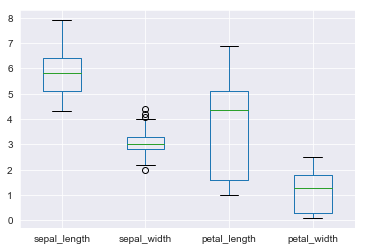

In [10]:
sns.set_style('dark')
df_iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length',
                       'petal_width'])
plt.show()

The largest variation appears in petal length while the smallest variation occurs in sepal width

**4) [P] Violin plots are becoming increasingly common in data science. First, what is a violin plot? Then, use
seaborn's violinplot() function to generate a univariate violin plot of each independent variable.
Compare and contrast your violin plot against the boxplot.**

It is similar to a boxplot, but has the added feature of showing the probability density of the data at each value.

In [11]:
independents = df_iris.columns.drop('species')

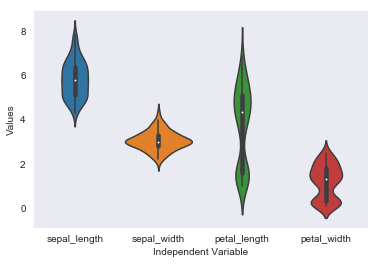

In [12]:
#Need to reshape using melt so that we can have multiple variables be represented
#https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p
df_violin = df_iris[independents].melt(var_name='Independent Variable',
                                      value_name='Values')
sns.set_style('dark')
sns.violinplot(x='Independent Variable', y='Values', data=df_violin)
plt.show()

**5) [P] Show a histogram and a density plot of each variable using whatever plotting method you prefer from
matplotlib, seaborn, or pandas.**

<Figure size 720x720 with 0 Axes>

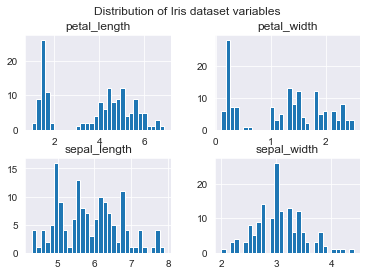

In [13]:
plt.figure(figsize=(10,10))
df_iris[independents].hist(bins=30)
plt.suptitle('Distribution of Iris dataset variables')
plt.show()

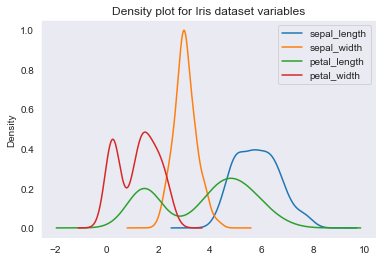

In [14]:
df_iris[independents].plot.kde()
plt.title("Density plot for Iris dataset variables")
plt.show()

**6) [P] Start by reading about the scatter_matrix() function in pandas. Use it to generate a scatterplot
matrix, and use species for the color.**

In [15]:
list(df_iris.species)

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


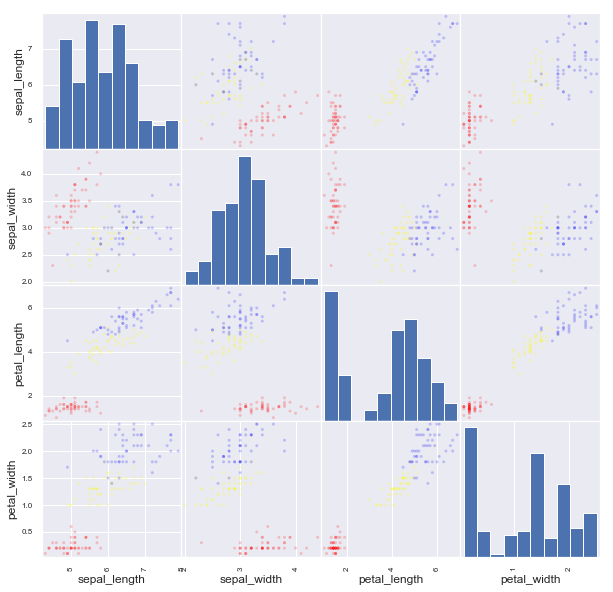

In [16]:
#see here for getting color from a specific column
#https://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix
sns.set()
groups = list(df_iris.species)
colors_palette = {'Iris-setosa': 'red', 'Iris-versicolor': 'yellow', 'Iris-virginica':'blue'}
colors = [colors_palette[c] for c in groups]
pd.plotting.scatter_matrix(df_iris, alpha=0.2, figsize=(10,10), c=colors)
plt.show()

**7) [P] Read about the seaborn pairplot() function, then use it to generate one of the most useful
scatterplots matrices you'll see with this data. Take a moment to study the plot, and really try to understand
just how much this plot is conveying. Be sure to figure out how to distinguish the species by color.**

In [17]:
df_iris.species.unique()

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

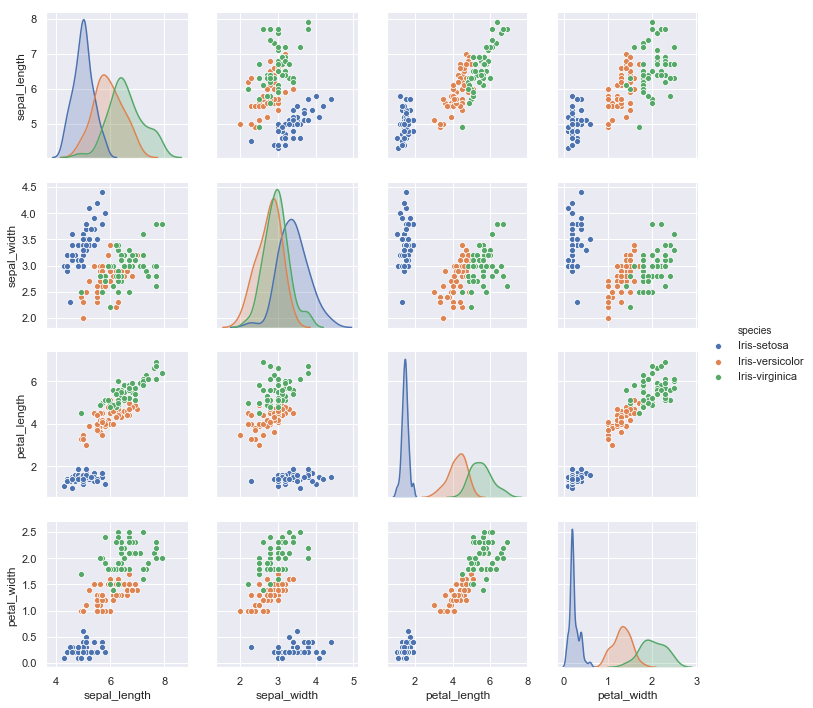

In [18]:
sns.pairplot(df_iris, hue='species')
plt.show()

**8) [P] Perform another boxplot, but this time, use pandas to plot the boxplot, and specify by="species" as a
parameter to perform grouping by species. (Also, use the figsize parameter to create a larger, more
readable figure. For example figsize=(12,6))**

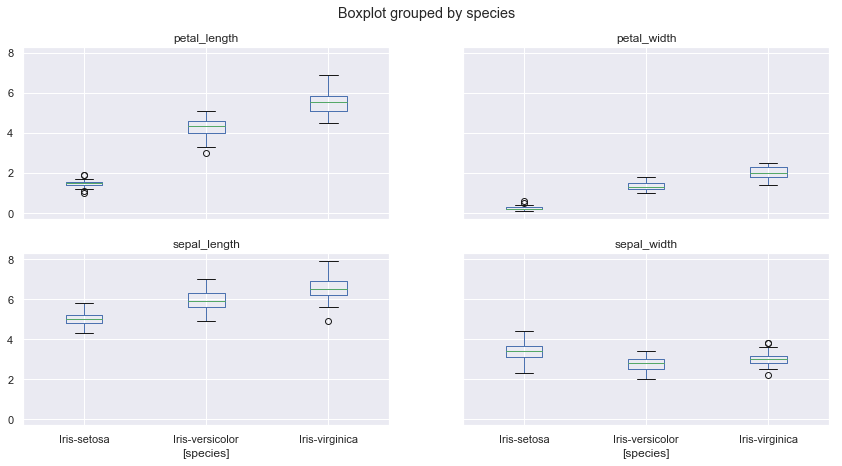

In [19]:
df_iris.boxplot(by='species', figsize=(14,7))
plt.show()

**9) [M] From your observations, which species do you expect to have the best classifier performance? Why?**

I expect the Iris-setosa to have the best classifier performance, because it is the most easy to distinguish on the pairplots, has the most prevalent presence for a certain range in the density plots, and has the least overlap with other species in the boxplot.

**10) [P] Create subsets of your data frame split into X and y, where X represents only your four predictor variables,
and y represents only the target class, species. Output the names of the columns and the shape of both
just to confirm that they both have the same number of observations, and that the number of variables in
each are correct. You should have (150, 4), and (150, 1) respectively**

In [20]:
X = df_iris[independents]
Y = pd.DataFrame(df_iris['species'])

In [21]:
print('X has cols {} and shape {}'.format(list(X.columns), X.shape))
print('Y has cols {} and shape {}'.format(list(Y.columns), Y.shape))

X has cols ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] and shape (150, 4)
Y has cols ['species'] and shape (150, 1)


**11) As you learned in class, you need to create a train / test split of your data to properly validate your model.
Read about sklearn.model_selection function called train_test_split. Then, use it to split
your data into an 70% / 30% split of training and testing data, respectively. You should end up with four data
frames, denoted X_train, X_test, Y_train, Y_test. Use an initial seed of 0. Be sure to shuffle the
data (verify that this is a default setting.)**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.3, 
                                                    random_state=0)

**12) Since we started with the decision tree model, let's begin there. The model we want to begin with is a DecisionTreeClassifier. You can read about it here: https://scikit-
learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html**

**(Generally, the sklearn documentation use the convention of clf for classifier objects. All classifiers have a
common interface, which is awesome! You use fit() to train a model with training data, and predict()
will predict a class label on any data it is given. A common interface like this makes is incredibly easy to try out
different models on your data.)
Create an instance of DecisionTreeClassifier with default parameters (be sure to read the docs to
understand the large number of parameters available for controlling tree construction.) It should basically
print out the model configuration. Use this model to predict back your training data to evaluate your model.
Call your predictions y_pred_train.**

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
y_pred_train = clf.predict(X_train)

**13) [P] Using your trained model, predict back the test data. Store your predictions in y_pred_test.**

In [25]:
y_pred_test = clf.predict(X_test)

**14) [P] So, how did your model do? There are several ways to assess model performance. Rather than exhaustively
compute them yourself, use scikit-learn's functionality in its metrics package to help you do this. Most of
these will require you to pass the true labels (i.e. your "ground truth") as well as your predictions.
Start by read about the function classification_report. Then, use it to print back the classification
results on both your training and your test data, thus evaluating and validating your model. This is amazing!
One line of code, and you have generated a full report, with metrics for each class.**

In [26]:
import sklearn
sklearn.__version__

'0.20.3'

In [27]:
print('Training Data \n')
print(classification_report(Y_train, y_pred_train))
print('\nTesting Data \n')
print(classification_report(Y_test, y_pred_test))

Training Data 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        39

      micro avg       1.00      1.00      1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105


Testing Data 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



**15) [M] Discuss what you are seeing with the classification report. What do the micro, macro, and weighted
average readings mean? Is the accuracy measure is missing? Look at your micro avg readings. What do you
think those are measuring? Which target class were most challenging to predict?**

In Micro-average method, you sum up the individual true positives, false positives, and false negatives of the system for different sets and then apply them to get the statistics.
<br>
In Macro-average, you take the average of the precision and recall of the system on different sets
<br>
Weighted average is the same as macro average with the exception that we assign a weight to each set based on the proportion of total data contained within that set.

Iris-versicolor was the most difficult one to predict since it had the lowest recall.

**16) [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to
determine which observations are being misclassified. Use data selection techniques to output the data in
df_iris that are being misclassified.**

In [28]:
Y_comp = Y_test.copy(deep=True)
Y_comp['predicted'] = y_pred_test
misclassified = Y_comp[Y_comp['predicted'] != Y_comp['species']].index
df_iris.iloc[misclassified]

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,Iris-versicolor


**17) [P] It's even more interesting when you can visualize where in your feature space your classifier might be
missing something. Create a scatterplot matrix, but this time, figure out how to highlight the instance(s) that
are being misclassified. Can you create a new variable that represents the accuracy of the prediction? Use it as
another dimension? A new color? A larger point size? Any scatter plot you can come up with that will highlight
the location of the misclassified data receives full credit. This is an important step in understanding how to
deal with problematic data.**

The additional variable misclassified represents whether it was classified correctly (False) or not (True)

In [29]:
df_iris['misclassified'] = False
df_iris.loc[list(misclassified), 'misclassified'] = True
df_iris['misclassified'] = df_iris['misclassified'].astype('category')

In [30]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length     150 non-null float64
sepal_width      150 non-null float64
petal_length     150 non-null float64
petal_width      150 non-null float64
species          150 non-null category
misclassified    150 non-null category
dtypes: category(2), float64(4)
memory usage: 5.3 KB


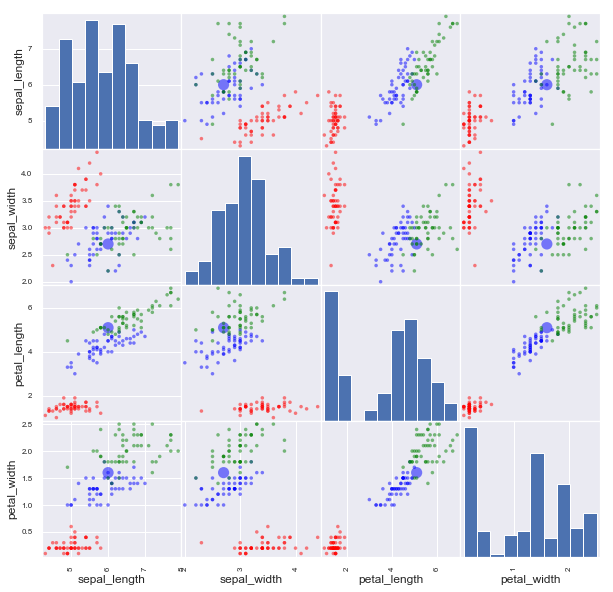

In [31]:
sns.set()
groups = list(df_iris.species)
colors_palette = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica':'green'}
colors = [colors_palette[c] for c in groups]
size_map = {False:50, True:500}
sizes = [size_map[s] for s in list(df_iris.misclassified)]
pd.plotting.scatter_matrix(df_iris, alpha=0.5, figsize=(10,10), s=sizes, c=colors)
plt.show()

You can see above that we are using size to draw out the instances which have been misclassified.

**18) [P] Read about sklearn.metrics.confusion_matrix, then output your confusion matrix on both
your training and your test data. Remember, the species variable has 3 possible values, and thus you will have
a 3x3 confusion matrix.**

In [32]:
confusion_matrix(Y_train, y_pred_train)

array([[34,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 39]], dtype=int64)

In [33]:
confusion_matrix(Y_test, y_pred_test)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

**19) [P] Read about the KFold class. State what a KFold cross validation object will do for you. Then, create an
instance of KFold with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your model
kfold.**

In [34]:
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

**20) [P] Read about the split() method for KFold. It will help you iterate through each fold of your data. Take
the time to understand how it works! If you set this up right, you will have a loop that will let you easily select
train and test data for each fold. Once you do that, then you are merely repeated what you did already for the
70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the
model on the test data for the same fold. After 10 folds, you will have validated your model using your entire
dataset as validation data! <br>
Inside your loop, you should NOT print out your classification results here. (However, sometimes it's useful to
use Python timing functions to collect timing on different model building tasks, and that would be done inside
the loop, placing a time stamp before and after the call to fit().) Only store the results of predicting on the
test fold. I would accumulate my true class label and my predictions in a separate data frame, called
df_results.**

**If you do this right, you will have a new data frame with a variable, such as "dt_def", or "dt_default",
representing the prediction from the default decision tree classifier.**

In [35]:
clf = DecisionTreeClassifier()
df_results = pd.DataFrame(index=df_iris.index,
                          columns=['true_class_label', 'prediction'])
array_results = []
df_results['true_class_label'] = Y
for k, (train, test) in enumerate(kfold.split(X, Y)):
    clf.fit(X.iloc[train], Y.iloc[train])
    y_pred_test = clf.predict(X.iloc[test])
    df_results.loc[test,['prediction']] = y_pred_test.reshape(len(y_pred_test),1) 

**21) [P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix.**

In [36]:
print(classification_report(df_results['true_class_label'], df_results['prediction']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.88      0.92      0.90        50
 Iris-virginica       0.92      0.88      0.90        50

      micro avg       0.93      0.93      0.93       150
      macro avg       0.93      0.93      0.93       150
   weighted avg       0.93      0.93      0.93       150



In [37]:
print(confusion_matrix(df_results['true_class_label'], df_results['prediction']))

[[50  0  0]
 [ 0 46  4]
 [ 0  6 44]]


**22) [P] Search scikit-learn for an example of plotting a confusion matrix. Use their code to plot your confusion
matrix from the 10 fold cross validation.**

In [38]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  4]
 [ 0  6 44]]


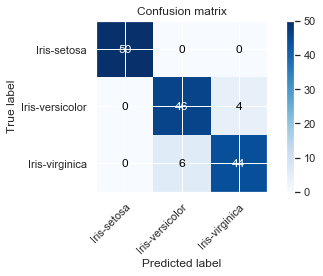

In [39]:
plot_confusion_matrix(df_results.true_class_label, df_results.prediction, 
                      classes=df_iris.species,
                          normalize=False,
                          title='Confusion matrix')
plt.show()

**23) [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross
validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified.**

In [40]:
df_results[df_results['prediction'] != df_results['true_class_label']]

,true_class_label,prediction
57,Iris-versicolor,Iris-virginica
70,Iris-versicolor,Iris-virginica
77,Iris-versicolor,Iris-virginica
83,Iris-versicolor,Iris-virginica
106,Iris-virginica,Iris-versicolor
119,Iris-virginica,Iris-versicolor
129,Iris-virginica,Iris-versicolor
133,Iris-virginica,Iris-versicolor
134,Iris-virginica,Iris-versicolor
138,Iris-virginica,Iris-versicolor


And here we have a report on the attributes of the misclassified instances

In [50]:
df_iris.drop(columns=['misclassified'], inplace=True)
misclassified = df_results[df_results['prediction'] != df_results['true_class_label']].index
df_iris.iloc[misclassified]

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


**24) [M] Discuss your findings with your model performance after 10-fold cross validation. Where are the
instances that were misclassified? Are they where you expected (along a decision boundary?) What classes
were most challenging? Discuss.**

Yes they occured along the decision boundary between Iris-versicolor and Iris-virginca, and misclassifications consist entirely of these two classes. At the same time, it turns out it was more difficult to correctly predict Iris-virginica than Iris-versicolor. 

**25) For your last task, you will perform model comparison tasks. How you make this happen is up to you.
However, you should write the code to compare the predictive performance on the following models:<br>
a. Default decision tree<br>
b. Decision tree with "entropy" for measuring impurity<br>
c. KNeighborsClassifier with a two different values of k (you will need to explore this a bit.)<br>
d. MultinomialNB classifier (sklearn's Naïve Bayes implementation)<br><br>
Compare and contrast the performance results between the different models. Which one would you choose?**

In [42]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

def compare_models(models, scoring_metric):
    seed = 3
    # evaluate each model in turn
    results = []
    names = []
    X = df_iris[independents]
    Y = df_iris['species']
    for name in models:
        model = models[name]
        kfold = KFold(n_splits=10, random_state=seed)
        curr_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(curr_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, curr_results.mean(), curr_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

Define which models we want to test for

In [43]:
models = {'Decision Tree': DecisionTreeClassifier(), 'Decision Tree with Entropy': DecisionTreeClassifier(criterion='entropy'),
         'KNNClassifier': KNeighborsClassifier(), 'MNBClassifier': MultinomialNB()}

Try by using the accuracy as a metric

Decision Tree: 0.946667 (0.058119)
Decision Tree with Entropy: 0.946667 (0.071802)
KNNClassifier: 0.933333 (0.084327)
MNBClassifier: 0.393333 (0.438634)


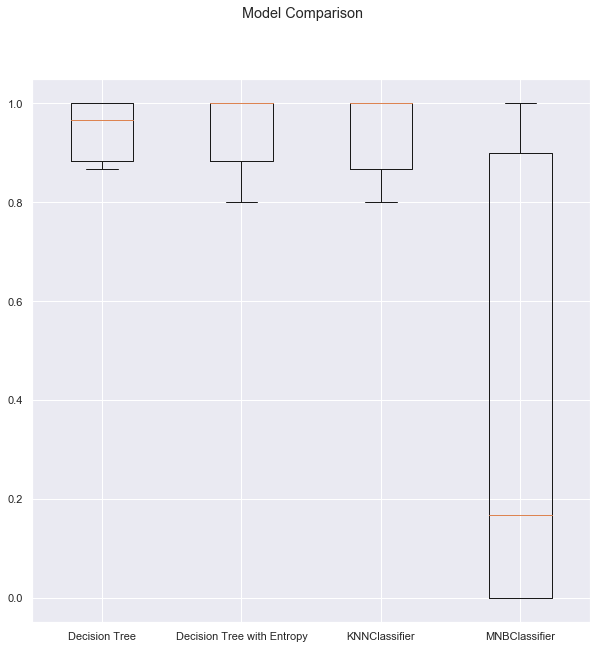

In [44]:
scoring = 'accuracy'
compare_models(models, scoring)

Then use f-1 micro

Decision Tree: 0.940000 (0.069602)
Decision Tree with Entropy: 0.933333 (0.078881)
KNNClassifier: 0.933333 (0.084327)
MNBClassifier: 0.393333 (0.438634)


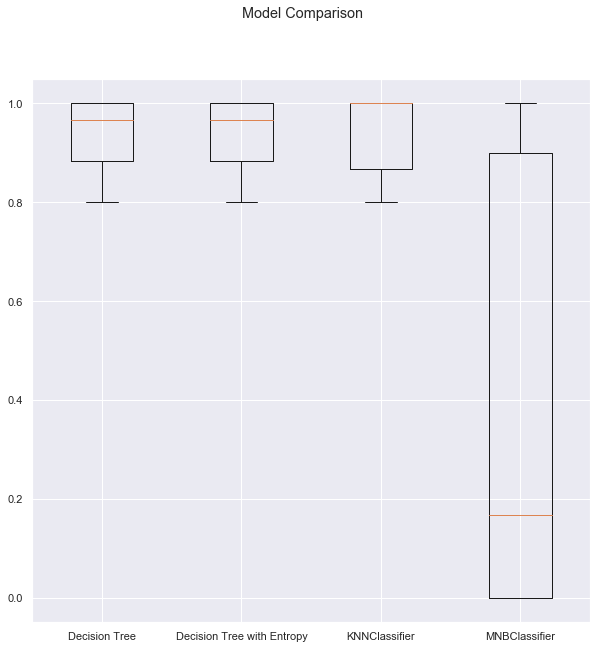

In [45]:
scoring = 'f1_micro'
compare_models(models, scoring)

It is clear from the two boxplots that KNNClassifier has the highest performance both in accuracy and for F-1 micro average, and so I'd choose that.